# Import Package

In [1]:
# openCV
import cv2 as cv

# basic
import numpy as np
import matplotlib.pyplot as plt

# Image Noisy Method

In [2]:
class ImageNoise():
    def __init__(self, img):
        self.img = img
    
    def gauss_distrib(self, mean, sigma, distrib_range):
        return np.exp(-((distrib_range-mean)**2)/(2*(sigma**2)))
    
    def gauss_noise(self, mean, sigma, distrib_range):
        # gaussian distribution
        gauss_distrib = self.gauss_distrib(mean, sigma, distrib_range)
        # calculate probability histogram
        prob_histogram = gauss_distrib / gauss_distrib.sum()
        # calculate cumulative histogram
        cum_histogram = np.cumsum([0]+prob_histogram)
        # cumulative probability lookup table
        y_cum = { cum_histogram[index]:range_value for index, range_value in enumerate(distrib_range) }
        
        img = np.copy(self.img)
        noisy_img = np.zeros(self.img.shape)
        row, col = img.shape
        
        for x in range(row):
            for y in range(col):
                # generate random float between 0 and 1, (0, 1]
                rand = np.random.rand()
                pixel = img[x][y]
                # search mapping gaussian noise
                for cum_prob in list(y_cum):
                    if cum_prob >= rand:
                        pixel += y_cum[cum_prob]
                        # avoid beyond grayscale(0 ~ 255) boundary
                        if pixel < 0:
                            pixel = 0
                        elif pixel > 255:
                            pixel = 255
                        # update after adding noise
                        img[x][y] = pixel
                        break
        return img
        
    def salt_pepper_noise(self, rate):
        '''
        # variables:
        # rate: noise percentage of the whole image
        # 1-rate: half of the percentage of the noise
        '''
        img = np.copy(self.img)
        row, col = img.shape
        
        for x in range(row):
            for y in range(col):
                # generate random float between 0 and 1, (0, 1]
                rand = np.random.rand()
                '''
                # noisy method:
                # if random float < rate then add Salt Noise
                # if random float > (1-rate) then add Pepper Noise
                '''
                if rand < rate:
                    img[x][y] = 0
                elif rand > (1-rate):
                    img[x][y] = 255
        return img
    

# Read Image

In [3]:
if __name__ == '__main__':
    # cameraman.tif
    # ntust_gray.jpg
    img = cv.imread('ntust_gray.jpg', cv.IMREAD_GRAYSCALE)

# Noisy Image

In [6]:
    noisy_type = int(input('Please input noise:\n1.Gaussian noise\n2.Salt & Pepper noise\n'))
    img_noise = ImageNoise(img)
    
    noisy_title, noisy_fname, compare_fname = '', '', ''
    if noisy_type == 1:
        noisy_title = 'Gaussian Noise'
        noisy_fname = 'gauss_noisy'
        compare_fname = noisy_fname + '_image'
        noisy_img = img_noise.gauss_noise(mean=0, sigma=25, distrib_range=np.arange(-100, 101))
    elif noisy_type == 2:
        noisy_title = 'Salt & Pepper Noise'
        noisy_fname = 'salt_pepper_noisy'
        compare_fname = noisy_fname + '_image'
        noisy_img = img_noise.salt_pepper_noise(rate=0.05)

Please input noise:
1.Gaussian noise
2.Salt & Pepper noise
 2


# Show Noisy Image

True

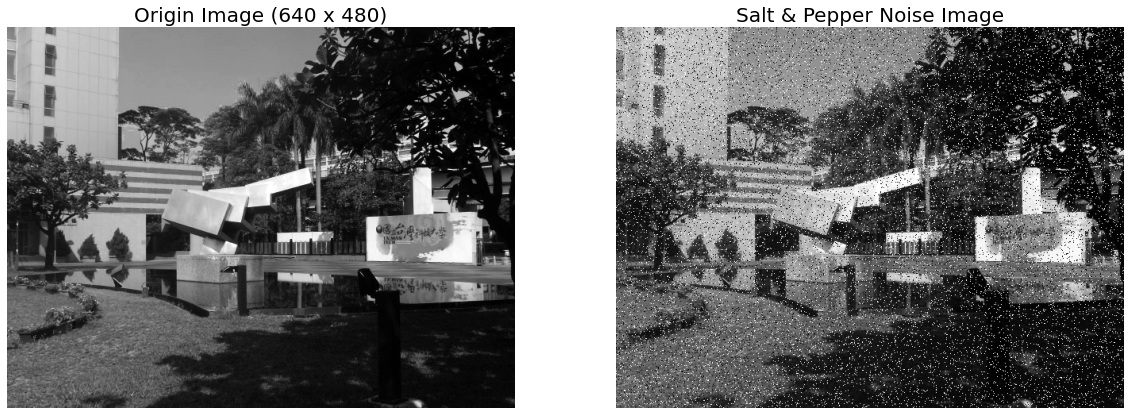

In [7]:
    plt.figure(figsize=(20, 20))

    plt.subplot(1,2,1)
    plt.title('Origin Image (%s x %s)' % (img.shape[1], img.shape[0]), fontsize=20)
    plt.imshow(img, plt.cm.gray)
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.title(noisy_title+' Image', fontsize=20)
    plt.imshow(noisy_img, plt.cm.gray)
    plt.axis('off')

    # plt.show()
    plt.savefig(noisy_fname+'.jpg')
    cv.imwrite(compare_fname+'.jpg', noisy_img)